In [1]:
from scrape_write import *
from preprocess import *

## Scrape and write

In [2]:
connection = connect()

hostname:  sculptor.stat.cmu.edu
port (press Enter to default to 5432):  
username:  ········
password:  ·········
database:  lmassera


Don't forget to close the connection when you are done


In [3]:
create_table(connection=connection, table_name="arxiv_papers")

In [5]:
df = scrape_and_write(categories=["astro-ph.GA", "stat.TH"], start_date="20191201", end_date="20201201", 
                      table_name="arxiv_papers", csv_folder_path="./", write_db=True, connection=connection)

[1] "astro-ph.GA paper count for given date range: 5548. Retrieving in portions of 1000 papers per iteration"


R[write to console]: retrieved batch 1

R[write to console]: retrieved batch 2



[1] "Sleeping for 10 seconds before iteration nº 1"


R[write to console]: retrieved batch 1

R[write to console]: retrieved batch 2



[1] "Sleeping for 10 seconds before iteration nº 2"


R[write to console]: retrieved batch 1

R[write to console]: retrieved batch 2



[1] "Sleeping for 10 seconds before iteration nº 3"


R[write to console]: retrieved batch 1

R[write to console]: retrieved batch 2



[1] "Sleeping for 10 seconds before iteration nº 4"


R[write to console]: retrieved batch 1



[1] "Sleeping for 10 seconds before iteration nº 5"


R[write to console]: retrieved batch 1

R[write to console]: retrieved batch 2



[1] "stat.TH paper count for given date range: 1910. Retrieving in portions of 1000 papers per iteration"


R[write to console]: retrieved batch 1

R[write to console]: retrieved batch 2



[1] "Sleeping for 10 seconds before iteration nº 1"


R[write to console]: retrieved batch 1

R[write to console]: retrieved batch 2



In [7]:
df.arxiv_category.unique()

array(['astro-ph.GA', 'stat.TH'], dtype=object)

In [8]:
df[df.arxiv_category == 'astro-ph.GA'].shape

(4045, 2)

In [9]:
df[df.arxiv_category == 'stat.TH'].shape

(1499, 2)

In [10]:
df.loc[0,"arxiv_abstract"]

'  [DBS2003]179 is a super star cluster in the Galaxy discovered by deep near\ninfrared observations. We carried out CO J=1-0 and J=3-2 observations of the\nregion of [DBS2003]179 with NANTEN2, ASTE and the Mopra 22m telescope. We\nidentified and mapped two molecular clouds which are likely associated with the\ncluster. The association is evidenced by the spatial correlation with the 8\nmicron Spitzer image, and a high ratio of the two transitions of 12CO (J=3-2 to\nJ=1-0). The two clouds show complementary distribution in space and bridge\nfeatures connecting them in velocity. We frame a hypothesis that the two clouds\ncollided with each other 1-2 Myr ago, and the collision compressed the\ninterface layer, triggering the formation of the cluster. This offers an\nadditional piece of evidence for a super star cluster formed by cloud--cloud\ncollision alongside of the four super star clusters including Wd2, NGC3603,\nRCW38 and R136. The findings indicate that the known super star cluster

## Preprocess

At this point we can either use the df above or query the PostgreSQL DB to obtain the desired categories

In [11]:
df = preliminary_preprocessing(df)

In [13]:
df.loc[0,"arxiv_abstract"]

'[dbs0]0 is a super star cluster in the galaxy discovered by deep near infrared observations. we carried out co j=0-0 and j=0-0 observations of the region of [dbs0]0 with nanten0, aste and the mopra 0m telescope. we identified and mapped two molecular clouds which are likely associated with the cluster. the association is evidenced by the spatial correlation with the 0 micron spitzer image, and a high ratio of the two transitions of 0co (j=0-0 to j=0-0). the two clouds show complementary distribution in space and bridge features connecting them in velocity. we frame a hypothesis that the two clouds collided with each other 0-0 myr ago, and the collision compressed the interface layer, triggering the formation of the cluster. this offers an additional piece of evidence for a super star cluster formed by cloud--cloud collision alongside of the four super star clusters including wd0, ngc0, rcw0 and r0. the findings indicate that the known super star clusters having closely associated dust

In [14]:
df = lemmatization(df)

100%|██████████| 5544/5544 [04:49<00:00, 19.15it/s]


In [15]:
df.loc[0,"lemmatized_abstract"]

['dbs0]0',
 'super',
 'star',
 'cluster',
 'the',
 'galaxy',
 'discover',
 'deep',
 'near',
 'infrared',
 'observation',
 'carry',
 'out',
 'j=0',
 'and',
 'j=0',
 'observation',
 'the',
 'region',
 'dbs0]0',
 'with',
 'nanten0',
 'aste',
 'and',
 'the',
 'mopra',
 'telescope',
 'identify',
 'and',
 'map',
 'two',
 'molecular',
 'cloud',
 'which',
 'be',
 'likely',
 'associate',
 'with',
 'the',
 'cluster',
 'the',
 'association',
 'evidence',
 'the',
 'spatial',
 'correlation',
 'with',
 'the',
 'micron',
 'spitzer',
 'image',
 'and',
 'high',
 'ratio',
 'the',
 'two',
 'transition',
 '0co',
 'j=0',
 'j=0',
 'the',
 'two',
 'cloud',
 'show',
 'complementary',
 'distribution',
 'space',
 'and',
 'bridge',
 'feature',
 'connect',
 '-PRON-',
 'velocity',
 'frame',
 'hypothesis',
 'that',
 'the',
 'two',
 'cloud',
 'collide',
 'with',
 'each',
 'other',
 'myr',
 'ago',
 'and',
 'the',
 'collision',
 'compress',
 'the',
 'interface',
 'layer',
 'trigger',
 'the',
 'formation',
 'the',
 'cl

In [16]:
df = tfidf_features(df)

In [17]:
df.iloc[0:1, 3:]

,0_,0a,0au,0b,0c,0c0,0cm,0co,0d,0deg,...,zel,zeldovich,zero,zeta,zhang,zone,zoo,zoom,ztf,zwicky
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151384,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Classify

In [18]:
cd ..

/Users/lucamasserano/Desktop/uni/cmu/statComp_36750/assignments-lucamasserano/classification-tree


In [78]:
from luCART.classification_tree import tree
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
data_set = df.drop(columns=['arxiv_abstract', 'lemmatized_abstract'])

In [23]:
data_set

,arxiv_category,0_,0a,0au,0b,0c,0c0,0cm,0co,0d,...,zel,zeldovich,zero,zeta,zhang,zone,zoo,zoom,ztf,zwicky
0,astro-ph.GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151384,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,astro-ph.GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,astro-ph.GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,astro-ph.GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,astro-ph.GA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5539,stat.TH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5540,stat.TH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5541,stat.TH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5542,stat.TH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA

In [56]:
pca = PCA(n_components=10, svd_solver="full")
transformed_input = pca.fit_transform(X=data_set.drop(columns="arxiv_category"))
transformed_input.shape

(5544, 10)

In [57]:
transformed_input

array([[-1.24356652e-01,  1.83449635e-02,  3.46186557e-03, ...,
        -1.83602655e-01, -6.09254731e-02,  1.91560379e-04],
       [-3.34556601e-02,  9.88640850e-02, -7.13628716e-04, ...,
         6.65301291e-02,  5.74921925e-02, -5.21052427e-02],
       [-1.25227126e-01,  1.30595956e-01, -8.57562047e-02, ...,
         1.01531619e-02, -6.69940781e-02,  1.43329927e-01],
       ...,
       [ 2.25767656e-01, -3.61926508e-03, -2.16251336e-02, ...,
        -5.98294977e-02,  2.77243024e-02,  6.30804784e-02],
       [ 1.61430237e-01,  3.57571271e-02,  1.83881042e-03, ...,
        -7.26291831e-03, -6.10760164e-02,  4.98368241e-02],
       [ 2.77351237e-01, -1.06746097e-02, -5.90280060e-02, ...,
        -2.95286369e-02,  8.21817644e-02,  1.34295265e-02]])

In [58]:
dataset = pd.concat([data_set.loc[:, ["arxiv_category"]], 
                     pd.DataFrame(transformed_input, columns=[f"pc{i}" for i in range(transformed_input.shape[1])])],
                    axis=1) 
dataset.head()

,arxiv_category,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,astro-ph.GA,-0.124357,0.018345,0.003462,-0.160158,-0.003441,-0.060600,-0.034262,-0.183603,-0.060925,0.000192
1,astro-ph.GA,-0.033456,0.098864,-0.000714,0.027339,0.082369,-0.027508,0.032476,0.066530,0.057492,-0.052105
2,astro-ph.GA,-0.125227,0.130596,-0.085756,-0.111373,-0.129115,0.053287,0.057295,0.010153,-0.066994,0.143330
3,astro-ph.GA,-0.003420,-0.077231,-0.087693,0.032592,0.099988,0.201855,-0.021669,0.043218,-0.031173,0.033789
4,astro-ph.GA,-0.070185,0.140611,0.022308,-0.052804,0.044839,-0.053163,0.025956,0.037924,-0.016901,-0.055558


### Split train test

In [59]:
def train_test_split(df, train_size):
    
    shuffled_indeces = np.random.permutation(df.index)
    index_end_train = int(np.floor(len(shuffled_indeces)*train_size))
    
    train_set, test_set = df.loc[shuffled_indeces[:index_end_train], :], df.loc[shuffled_indeces[index_end_train:], :]
    
    return train_set, test_set

In [102]:
train_set, test_set = train_test_split(dataset, 0.7)

In [103]:
train_set.shape, test_set.shape

((3880, 11), (1664, 11))

### Classification Tree

In [106]:
clf_tree = tree.ClassificationTree(impurity_function="gini", data_source_type="dataframe", min_datapoints_split=25)

This took a very long time to fit. With ~5500 observations and 11 columns (in the PCA-transformed space) several minutes are required. Nonetheless the classifier performed really well for the categories "astro-ph.GA" and "stat.TH", as we can see below. This is probably due to the fact that the two categories are quite different in terms of topics and words used. Moreover, tfidf scores provide a good deal of information regarding the language used, as reflected in the high explanatory power.

In [107]:
clf_tree.fit(data=train_set, label="arxiv_category")

In [108]:
clf_tree.show(clf_tree.root)

root
left:
  pc0 < 0.0826206230240695
  left:
    pc0 < 0.06624913158974371
  right:
    pc0 >= 0.06624913158974371
    left:
      pc8 < -0.02014750700391553
    right:
      pc8 >= -0.02014750700391553
right:
  pc0 >= 0.0826206230240695
  left:
    pc5 < 0.04861984223387446
    left:
      pc2 < 0.05301232286816154
      left:
        pc0 < 0.11685830310965502
        left:
          pc9 < -0.030351292722675893
        right:
          pc9 >= -0.030351292722675893
          left:
            pc6 < -0.05072272607993797
          right:
            pc6 >= -0.05072272607993797
            left:
              pc2 < -0.04419961111756422
            right:
              pc2 >= -0.04419961111756422
              left:
                pc3 < -0.04066437007743569
              right:
                pc3 >= -0.04066437007743569
      right:
        pc0 >= 0.11685830310965502
        left:
          pc3 < 0.059983432578580326
          left:
            pc7 < 0.032955790299872834
            lef

In [109]:
predictions = clf_tree.predict(new_data=test_set.drop(columns="arxiv_category"))

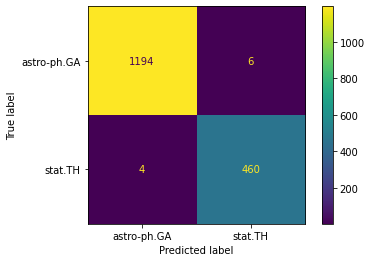

In [87]:
cm = confusion_matrix(y_true=clf_tree.label_encoder.transform(test_set.arxiv_category), 
                      y_pred=predictions)
display = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                 display_labels=['astro-ph.GA', 'stat.TH'])
display = display.plot(include_values=True,
                       cmap="viridis", ax=None, xticks_rotation="horizontal")
plt.show()